<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/EDA/blob/master/data_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_acquisition">Data Acquisition</a>
    <li><a href="#basic_insight">Basic Insight of Dataset</a></li>
</ol>

Estimated Time Needed: <strong>10 min</strong>
</div>
<hr>

<h1 id="data_acquisition">Data Acquisition</h1>
<p>
There are various formats for a dataset, .csv, .json, .xlsx  etc. The dataset can be stored in different places, on your local machine or sometimes online.<br>
In this section, you will learn how to load a dataset into our Jupyter Notebook.<br>
In our case, the Automobile Dataset is an online source, and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.


In [129]:
data_source = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.<br>
Because the data does not include headers, we can add an argument <code>headers = None</code>  inside the  <code>read_csv()</code> method, so that pandas will not automatically set the first row as a header.<br>
You can also assign the dataset to any variable you create.
</p>

In [131]:
car_DF = pd.read_csv(data_source, header=None)

In [132]:
# Let's view the top 5 rows of the car_df

car_DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1: </h1>
<b>check the bottom 10 rows of data frame "df".</b>
</div>

In [133]:
car_DF.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<h3>Add Headers</h3>
<p>
Take a look at our dataset; pandas automatically set the header by an integer from 0.
</p>
<p>
To better describe our data we can introduce a header, this information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>
</p>
<p>
Thus, we have to add headers manually.
</p>
<p>
Firstly, we create a list "headers" that include all column names in order.
Then, we use <code>dataframe.columns = headers</code> to replace the headers by the list we created.
</p>

In [134]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [135]:
# Adding the headers column list as header to our car_df

car_DF.columns = headers

In [136]:
# Lets display the first 5 rows again to view the updated columns

car_DF.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [137]:
car_DF.shape

# This tells us the car_df has 206 rows and 26 columns 

(205, 26)

### Missing Values  
**Dealing with missing values could include:-**  
_**1. Check with the data collection source if the missing values can be retrieved.**_  
_**2. Drop or remove missing values, either by rows or if necessary by entire columns.**_  
_**3. Replace missing values, is a better option than dropping. One common method is-  
replace missing values by the average of the variable column or if no average then by the mode.**_  
_**4. Finally missing values can be left asis it may be useful to keep them as missing**_

**we can drop missing values along the column "price" as follows**

In [138]:
# to identify unique elements we can simply use the dot notation

car_DF.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [139]:
# Note axis=0 refers to the index or rows... While axis=1 refers to the columns
# subset can take more than one arg. That is, more than one column to drop missing values from.
# inplace=True means modify the original dataframe.
# thresh=2, for example means drop all rows with more than two missing values 

In [140]:
# First lets iterate through the price column and identify any data that is empty or NaN or ?
price_series = pd.Series(car_DF['price'])

def identify_chars(price_series):
    chars = []
    for i in price_series:
        try:
            int(i)
        except:
            chars.append(i)
    return chars

In [141]:
non_int_price = identify_chars(price_series) 
non_int_price

# we can see that missing values are represented with '?' only in price column

['?', '?', '?', '?']

In [142]:
# next let's replace missing values with NaN so we can drop them

car_DF['price'].replace('?', pd.NaT, inplace=True)

# Let's confirm the number of rows and cols before we drop the above 4 rows so we are in check
car_DF.shape

(205, 26)

In [143]:
# Now lets drop the four missing values from price column

car_DF.dropna(subset=['price'],axis='index',inplace=True)

In [144]:
# Lets reconfirm the number of rows after the drop

car_DF.shape

# we can see exactly 4 missing price value rows have been dropped

(201, 26)

#### Replacing missing values

In [145]:
# Let's define a sample data frame
a = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[0,4,8]], columns=['A','B','C'], index=['a','b','c','d'])
b = pd.DataFrame([[2,1,3],[4,9,5],[8,7,3],[6,4,2]], columns=['A','B','D'], index=['a','b','c','d'])

In [146]:
c = a + b

In [147]:
c

,A,B,C,D
a,3,3,NaN,NaN
b,8,14,NaN,NaN
c,15,15,NaN,NaN
d,6,8,NaN,NaN


**Using the .fillna method**

In [148]:
# we can select a given column and use .fillna to pass a value and use inplace to make it stick
# fillna will replace all NaN values by the specified value we choose.

c['D'].fillna(7,inplace=True)

In [149]:
c

,A,B,C,D
a,3,3,NaN,7.0
b,8,14,NaN,7.0
c,15,15,NaN,7.0
d,6,8,NaN,7.0


**Using the .replace method**

In [150]:
# we can select a given column and use .replace, which takes two fundamental arguments...
# The first is the value we want to replace, the second is the replace value, finally inplace to make it stick
c['C'].replace(np.nan,0,inplace=True)

In [151]:
c

,A,B,C,D
a,3,3,0.0,7.0
b,8,14,0.0,7.0
c,15,15,0.0,7.0
d,6,8,0.0,7.0


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>Find the name of the columns of the dataframe</b>
</div>

In [152]:
car_DF.columns

# This will display a list of the column names of car_df

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<h2>Save Dataset</h2>
<p>
Correspondingly, Pandas enables us to save the dataset to csv  by using the <code>dataframe.to_csv()</code> method, you can add the file path and name along with quotation marks in the brackets.
</p>
<p>
    For example, if you would save the dataframe <b>df</b> as <b>automobile.csv</b> to your local machine, you may use the syntax below:
</p>

In [153]:
new_car_df_to_csv = car_DF.to_csv('new_car-df.csv')

<h2>Data Types</h2>
<p>
Data has a variety of types.<br>
The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:
</p>

In [154]:
# Let's display the various columns and their default data types from car_df
car_DF.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h4>To display Data type of just one variable or column</h4>

In [155]:
car_DF['highway-mpg'].dtypes

dtype('int64')

<h2>Describe</h2>
If we would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:

In [156]:
car_DF.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201,201,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201,201,201.000000,201,201,201.000000,201.000000,201
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,39,37,NaN,59,23,NaN,NaN,186
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,4800,NaN,NaN,8845
freq,NaN,37,32,181,165,113,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


#### Let's pay some attention to the types of wheel-drives that exist for the cars in our data set

In [157]:
# To check the different types of drive types in the drive-wheels column

car_DF['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

### Using the series.value_counts() method to get the count of unique values in drive-wheels column

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>

In [158]:
# We can check how many cars are rwd or fwd or 4wd using pandas series value_counts()

drive_wheels_count = car_DF['drive-wheels'].value_counts()
drive_wheels_count

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

#### We can convert the series to a Dataframe as follows :

In [159]:
drive_wheels_df = drive_wheels_count.to_frame()

In [160]:
drive_wheels_df

,drive-wheels
fwd,118
rwd,75
4wd,8


In [161]:
# Let's now rename 'drive-wheels' in drive_wheels_df to 'value-count'

drive_wheels_df.rename(columns={'drive-wheels':'value-count'}, inplace=True)

In [162]:
# display the new drive_wheels_count data frame

drive_wheels_df

,value-count
fwd,118
rwd,75
4wd,8


In [163]:
# Finally let's rename the index to drive-wheels

drive_wheels_df.index.name = 'wheels-drive'

In [164]:
drive_wheels_df

,value-count
wheels-drive,
fwd,118
rwd,75
4wd,8


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<p>
You can select the columns of a data frame by indicating the name of  each column, for example, you can select the three columns as follows:
</p>
<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3']]</code>
</p>
<p>
Where "column" is the name of the column, you can apply the method  ".describe()" to get the statistics of those columns as follows:
</p>
<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3'] ].describe()</code>
</p>

Apply the  method to ".describe()" to the columns 'length' and 'compression-ratio'.
</div>

In [165]:
car_DF[['length','compression-ratio']].describe(include='all')

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [166]:
car_DF[['length','width','height']].describe()

,length,width,height
count,201.000000,201.000000,201.000000
mean,174.200995,65.889055,53.766667
std,12.322175,2.101471,2.447822
min,141.100000,60.300000,47.800000
25%,166.800000,64.100000,52.000000
50%,173.200000,65.500000,54.100000
75%,183.500000,66.600000,55.500000
max,208.100000,72.000000,59.800000


### Applying Calculations to entire columns

#### Each column of a Data frame is itself a pandas series

In [167]:
type(car_DF['length'])

pandas.core.series.Series

#### We can add a value to every index of a specific column in a Data frame as follows

In [168]:
# Let's define a sample or test data frame for this exercise

test = pd.DataFrame([[1,2,3],[9, 8, 7],[5, 7, 6]],columns = ['A','B','C'])
test

,A,B,C
0,1,2,3
1,9,8,7
2,5,7,6


In [169]:
# Now let's add 5 to each element in column C

test['C'] = test['C'] + 5

In [170]:
# Display test to show the updated column C

test

,A,B,C
0,1,2,8
1,9,8,12
2,5,7,11


#### Converting values from one metric to another in Data frame columns

In [171]:
# Let's define a sample data frame
test_car = pd.DataFrame([[109,26.0,3],[114,29.4,6],[111,28.7,9],[115,25.6,8]], \
                 columns=['Length','MPG','UNIT'], index=['a','b','c','d'])

In [172]:
test_car

,Length,MPG,UNIT
a,109,26.0,3
b,114,29.4,6
c,111,28.7,9
d,115,25.6,8


In [173]:
# If we want to convert miles per gallon(MPG) to litres per 100km(L/100km)...
# Ofcourse we know the conversion is 235 divided by the MPG value, so...

test_car['MPG'] = 235/test_car['MPG']

# This converts the data from MPG to L/100km for each entry in the MPG column

In [174]:
# Let's display test_car to see conversion

test_car

,Length,MPG,UNIT
a,109,9.038462,3
b,114,7.993197,6
c,111,8.188153,9
d,115,9.179688,8


#### Renaming a Column Header in a Data Frame using the .rename() method

In [175]:
# Now let's rename MPG column header to L/100km using the .rename method:
# REMEMBER TO INCLUDE inplace=True... To make it stick!

test_car.rename(columns={'MPG':'L/100km'},inplace=True)

In [176]:
# Let's display test_car to see the column header update

test_car

,Length,L/100km,UNIT
a,109,9.038462,3
b,114,7.993197,6
c,111,8.188153,9
d,115,9.179688,8


#### Correcting Data types in the column of a DataFrame or Series:

_Step One_

In [177]:
# First we must use the dataframe.dtypes() method to ascertain the types of data for each column.

# If we spot the wrong data type in any of our columns, then we go to step two

test_car.dtypes

Length       int64
L/100km    float64
UNIT         int64
dtype: object

_Step Two_

In [178]:
# we can now use the dataframe.astype() method to convert the wrong column to our preferred data type

test_car['Length'] = test_car['Length'].astype('float64') 

In [179]:
test_car

,Length,L/100km,UNIT
a,109.0,9.038462,3
b,114.0,7.993197,6
c,111.0,8.188153,9
d,115.0,9.179688,8


In [180]:
# Now let's sisplay the column types and see if Length col has changed from int64 to float64

test_car.dtypes

Length     float64
L/100km    float64
UNIT         int64
dtype: object

### Data Normalization  
**There are several methods for normalizing data**  
**But we shall go through just three(3) of them**

_**1. Simple Feature Scaling**_  
_This method simply divides each value by the maximum value for that feature..._  
_The resultant values are in the range between zero(0) and one(1)_

$Xnew =$ $Xold \over Xmax$ 


In [181]:
# Let's create a data frame of just the width column of car_df for this analysis

width_df = car_DF[['width']]
width_df.head()

,width
0,64.1
1,64.1
2,65.5
3,66.2
4,66.4


In [182]:
# To do simple feature scaling on width_df we divide each element by the max value of width_df

width_df_SFS = width_df / width_df.max()
width_df_SFS.head()

,width
0,0.890278
1,0.890278
2,0.909722
3,0.919444
4,0.922222


_**2. Min-Max Method**_  
_This method takes each value and subtracts the min and then divides by the range(max - min)..._  
_The resultant values range between zero(0) and one(1)_

$Xnew =$ $Xold - Xmin \over Xmax - Xmin$

In [183]:
# Let's create a data frame of just the length column of car_df for this analysis

length_df = car_DF[['length']]
length_df.head()

,length
0,168.8
1,168.8
2,171.2
3,176.6
4,176.6


In [184]:
# To do Min-Max normalization on length_df we subtract the min and divide by the range for each value

length_df_MM = (length_df - length_df.min()) / (length_df.max() - length_df.min())
length_df_MM.head()

,length
0,0.413433
1,0.413433
2,0.449254
3,0.529851
4,0.529851


_**3. Z-Score or Standard Score**_  
_For each value here, we subtract the average or mean..._  
_And then divide by the Standard deviation._  
_This gives a range between minus 3 and 3, but can be more or less_  

$Xnew =$ $Xold - mean \over STD(sigma)$

In [185]:
# Let's create a data frame of just the height column of car_df for this analysis

height_df = car_DF[['height']]
height_df.head()

,height
0,48.8
1,48.8
2,52.4
3,54.3
4,54.3


In [186]:
# To do Z-Score normalization for each value on height_df we subtract the mean and divide by the standard deviation

height_df_Zscore = (height_df - height_df.mean()) / height_df.std()
height_df_Zscore.head()

,height
0,-2.029015
1,-2.029015
2,-0.558319
3,0.217881
4,0.217881


### Binning  
_This is a method for Data pre-processing. Binning involves grouping data values into bins._  
_For example we can bin age variable or series into 0-5, 6-10, 11-15 bins and so on._  
_Sometimes binning can improve accuracy of predictive models_
_As well as make analysing data easier._  

#### Let's use Binning on the 'price' col or variable in car_DF to categorise price into low, medium and high.

In [187]:
# First lets convert the price column from object to float first...

car_DF['price'] = car_DF['price'].astype('float64')

In [188]:
# Now let's convert price to an int

car_DF['price'] = car_DF['price'].astype('int64')

_**Binning Step One: Defining the bin width**_  
_Since we want 3 bins, our binwidth should be 3 in order to get a proper all equal width_

In [189]:
# Lets begin the Binning process proper

binwidth = (max(car_DF['price']) - min(car_DF['price'])) // 3
binwidth

13427

**Binning Step Two: Creating The Bin Array**_  
_From min value to max value using a range and also passing binwidth as the step_

In [190]:
bin = list(range(min(car_DF['price']), (max(car_DF['price'])), binwidth))
bin

[5118, 18545, 31972, 45399]

**Binning Step Three: Creating labes for each Bin**_  
_We now create a simple list of labels:- Low, Medium, High_

In [191]:
group_names = ['Low', 'Medium', 'High']

**Binning Step Four: Finally we create a new column with the defined bins as its values** 

In [192]:
car_DF['price_binned'] = pd.cut(car_DF['price'], bin, labels= group_names, include_lowest=True)
car_DF

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Low
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Low
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Medium
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Medium
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,Medium


In [193]:
high = car_DF[car_DF['price_binned']=='High'] 
print(f'min high {min(high.price)} and max high {max(high.price)}')

min high 32250 and max high 41315


In [194]:
med = car_DF[car_DF['price_binned']=='Medium'] 
print(f'min med {min(med.price)} and max high {max(med.price)}')

min med 18620 and max high 31600


In [195]:
low = car_DF[car_DF['price_binned']=='Low'] 
print(f'min low {min(low.price)} and max low {max(low.price)}')

min low 5118 and max low 18420


In [196]:
check = car_DF[(car_DF['price_binned']!='Low') & (car_DF['price_binned']!='High') & (car_DF['price_binned']!='Medium')]
check

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned


#### Lets try to visualize the price and price_binned columns

In [197]:
x = car_DF['price_binned']
y = car_DF['price']

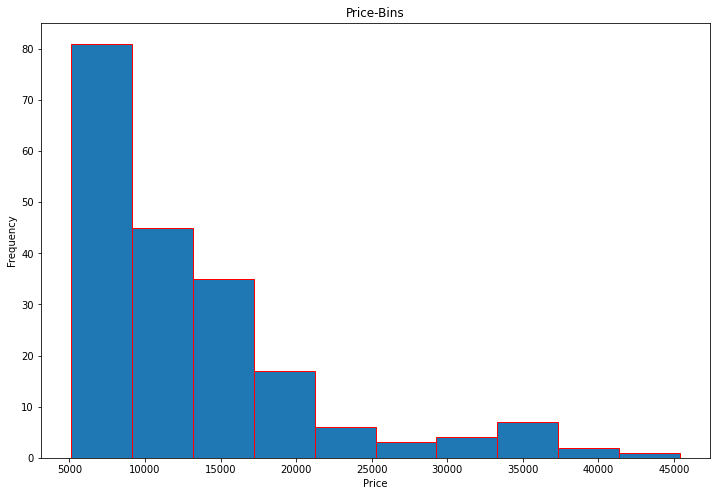

In [198]:
plt.figure(figsize=(12, 8))
plt.hist(y,edgecolor='r')
plt.title('Price-Bins')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Boolean indexing in multiple columns of an Array or DataFrame

In [199]:
test = [[1, pd.NaT,2,3,4,5,6,7],[5,6,2,8,5,2,6,4],[11,7,1,2,4,5,7,6],[6, 1, 7, 9, 3, 8,5,1],[9,5,9,7,1,2,6,8]]
t = pd.DataFrame(test,columns=['A', 'B', 'C','D','E','F','G','H'],index=['GB','NG','AU','GH','RU'])
t

,A,B,C,D,E,F,G,H
GB,1,NaT,2,3,4,5,6,7
NG,5,6,2,8,5,2,6,4
AU,11,7,1,2,4,5,7,6
GH,6,1,7,9,3,8,5,1
RU,9,5,9,7,1,2,6,8


**Ex. 1: Multiple Booleans with pandas square brackets**  
_select from dataframe t the rows where col C >= 2 and col F > 2_

In [200]:
t[(t['C']>=2) & (t['F']>2)]

,A,B,C,D,E,F,G,H
GB,1,NaT,2,3,4,5,6,7
GH,6,1,7,9,3,8,5,1


**Ex. 2: Multiple Booleans with pandas square brackets**  
_select from dataframe t the rows where col C >= 5 or col C == 2_

In [201]:
t[(t['C']>=5) | (t['C']== 2)]

,A,B,C,D,E,F,G,H
GB,1,NaT,2,3,4,5,6,7
NG,5,6,2,8,5,2,6,4
GH,6,1,7,9,3,8,5,1
RU,9,5,9,7,1,2,6,8


**Ex. 3: Multiple Booleans on DF with np.logical_and condition**  
_select from dataframe t the rows where col A <= 6 and col H < 5_

In [202]:
t[np.logical_and(t['A'] <= 6, t['H']<5)]

,A,B,C,D,E,F,G,H
NG,5,6,2,8,5,2,6,4
GH,6,1,7,9,3,8,5,1


**Ex. 4: Multiple Booleans on DF with np.logical_or condition**  
_select from dataframe car-DF the rows where price <= 5000 or >= 35000_

In [203]:
car_DF[np.logical_or(car_DF['price']<= 10000, car_DF['price']>=35000)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315,High
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880,High
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151,Low
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295,Low
20,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2212,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195,Low
186,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2275,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495,Low
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.40,23.0,68,4500,37,42,9495,Low
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995,Low


In [204]:
car_DF['price_binned'].count()

# This means of the 201 cardinality or index, two are unaccounted for, hence 199 instead of 201 

200

In [205]:
car_DF.price_binned.unique()

[Low, Medium, High, NaN]
Categories (3, object): [Low < Medium < High]

### How to turn Categorical Variables to Quantitative Variables

#### _One Hot Encoding_  
_When a categorical variable has 2 or more features we can create additional features of default zeroes and ones_  
_So that When a particular feature is active we denote 1 and assign zeros to the rest of the categories, and vice versa_  
_This process is called One-Hot-Encoding. It can be used to assign quantitative values to categorical variables for analysis_

In [206]:
# In pandas, we can use get_dummies() method to convert categorical variables to dummy variables of zero or one.

# In car_DF we can see that the fuel column is a categorical variable of types fuel or diesel...
# We can use the get_dummy method to quantify these categorical variables

get_dummies_1 = pd.get_dummies(car_DF['fuel-type'])
get_dummies_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


### Pandas groupby() method  
**We can use the groupby method to group variables. We may group variables together to compare the relationship between them**

In [207]:
# Lets group the drive-wheels, body-style and price columns to see if certain wheel types and body style affect price

# first let's select the columns we are interested in

compare_df = car_DF[['drive-wheels','body-style','price']]

# Now lets group our data intosub-categories and display only the mean or average price for each sub-category

compare_grpby = compare_df.groupby(['drive-wheels','body-style'],as_index=False).mean()

compare_grpby

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [208]:
# Let's round the price

compare_grpby['price'] = round(compare_grpby['price'],2)
#compare_grpby

### Pivot Table: Let's visualize better the groupby() data using Pandas Pivot table  
**A pivot table has one variable displayed along the columns and the other variable displayed along the rows**

In [209]:
# The pivot table makes it a lot easier to see the relationship amongst subsets of body-styles and wheel-drives

compare_pivot = compare_grpby.pivot(index='drive-wheels', columns='body-style')
compare_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  NaN       NaN   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

In [210]:
# Lets convert NaN values in the pivot table to 0

compare_pivot.replace(np.nan,0, inplace=True)

In [211]:
# Let's display the updated pivot table

compare_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

In [212]:
# We can print out the index of compare pivot with the following syntax.

t = compare_pivot.index
t

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

### Heat Maps:  
**This is another way to represent the Pivot Table. Heat Map plots take a rectangular grid of Data and assigns a color intensity,**  
**based on the value of the data at grid points. The higher the value, the darker the colors**  
**it's a great way to plot the relationship between multiple variables and their target.**

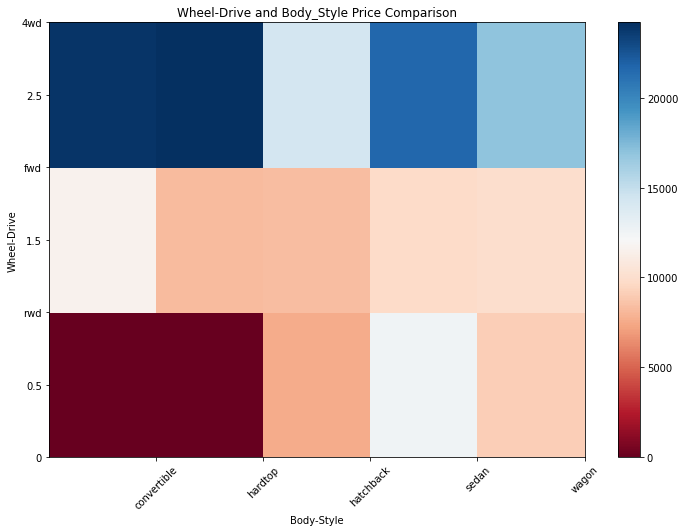

In [213]:
# set the figure size
plt.figure(figsize=(12,8))

# Set the pcolor variables
plt.pcolor(compare_pivot, cmap='RdBu')

# set the title
plt.title('Wheel-Drive and Body_Style Price Comparison')

# set the y-label name
plt.ylabel('Wheel-Drive')

# set the ytick labels
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],[0, 0.5, 'rwd', 1.5, 'fwd', 2.5, '4wd'])

# set the xtick labels
plt.xticks([1, 2, 3, 4, 5],['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])

# set the xtick rotation:- very useful if label is too long horizontally
plt.xticks(rotation=45)

# set the x label
plt.xlabel('Body-Style')

# display the color bar legend on the side
plt.colorbar()

# finally show
plt.show()

#### Let's do the above heatmap again with same variables body-style and wheel-drive

In [214]:
compare_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

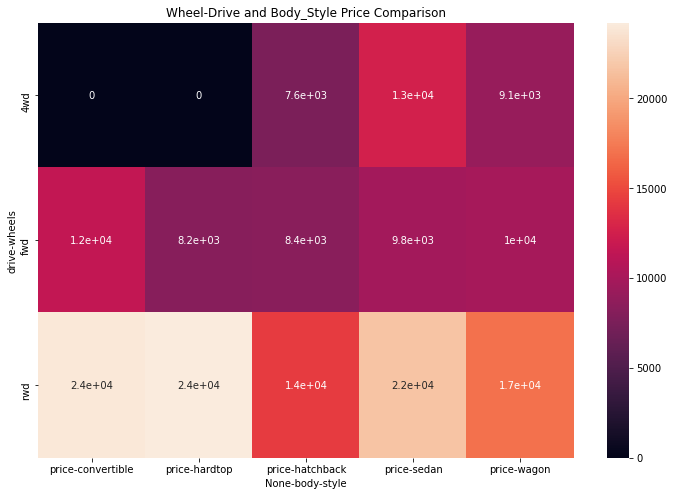

In [215]:
plt.figure(figsize=(12,8))
plt.title('Wheel-Drive and Body_Style Price Comparison')
sns.heatmap(compare_pivot, annot=True)
plt.show()

#### Possible color codes for the heat maps

ValueError: Colormap R_Blue is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

## Correlation:  
<font color='khaki'><h3>**Correlation is a statistical metric for measuring to what extent different variables are interdependent.**  
**Inother words, when we look at 2 variables, if one variable changes, how does it affect change in the other variable?**.  
**It is very important to state here that correlation does not imply causation... <br>
    The fact that the use of umbrellas seem to be correlated to rains, <br>Does not mean rains cause umbrellas or umbrellas cause rains.** </font></h3>

#### 1. Let's visualize correlation between engine size and price

In [216]:
# Lets look at the correlation between engine size and price using seaborn and matplotlib
# We visualize them using a scatter plot and an added linear line called a regression line that shows their relationship

(0.0, 53619.047455745276)

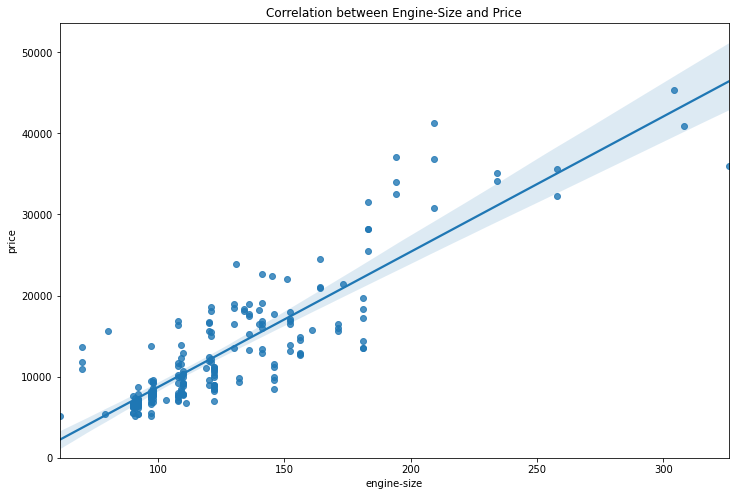

In [217]:
plt.figure(figsize=(12,8))
plt.title('Correlation between Engine-Size and Price')
sns.regplot(x='engine-size', y='price', data=car_DF)
plt.ylim(0,)

#### The above plot shows that engine size and price have a positive linear relationship and positive correlation.  
#### This means an increase in engine size naturally leads to a possible increase in price

#### 2. let's visualize correlation between highway-miles per gallon and see its impact on car price

(0.0, 48168.475450259)

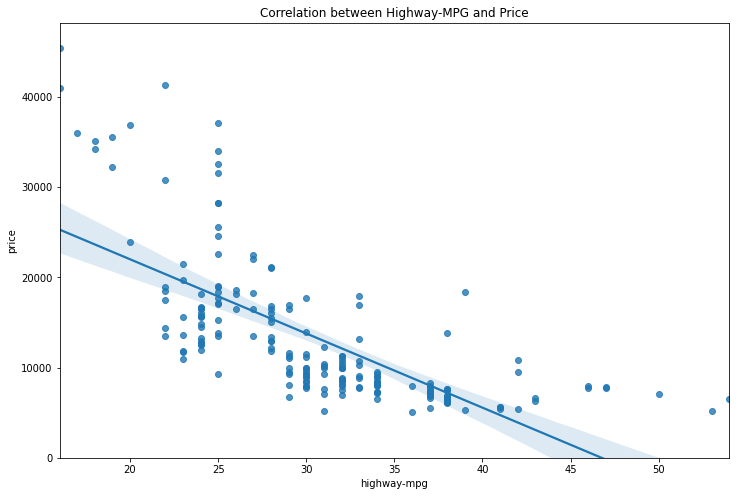

In [218]:
plt.figure(figsize=(12,8))
plt.title('Correlation between Highway-MPG and Price')
sns.regplot(x='highway-mpg', y='price', data=car_DF)
plt.ylim(0,)

#### The above plot shows that Highway-mpg and price have a negative linear relationship and negative correlation.  
#### This means an increase in Hw-mpg naturally leads to a possible decrease in price.  
**And although this relationship is negative,the slope is steep and solid, so highway-mpg is still a good predictor of price**

#### 3. Now let's compare peak-rpm to price

In [219]:
# earlier we saw that peak-rpm is a pandas object type and needs to be converted to int.
# First lets look at the unique elements in peak-rpm

car_DF['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '?', '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [220]:
# Next let's convert all non values to '0' then convert all values to int
car_DF['peak-rpm'].replace('?','0', inplace=True)

In [221]:
# Next let's convert peak-rpm to int
car_DF['peak-rpm'] = car_DF['peak-rpm'].astype('int64')

In [222]:
# Now lets find the mean of peak-rpm
mean_rpm = car_DF['peak-rpm'].mean()

# And convert the mean to int
mean_rpm = int(mean_rpm)
mean_rpm

5066

In [223]:
# Now lets replace the zero values with the mean value
car_DF['peak-rpm'].replace(0, mean_rpm,inplace=True)

(0.0, 47414.1)

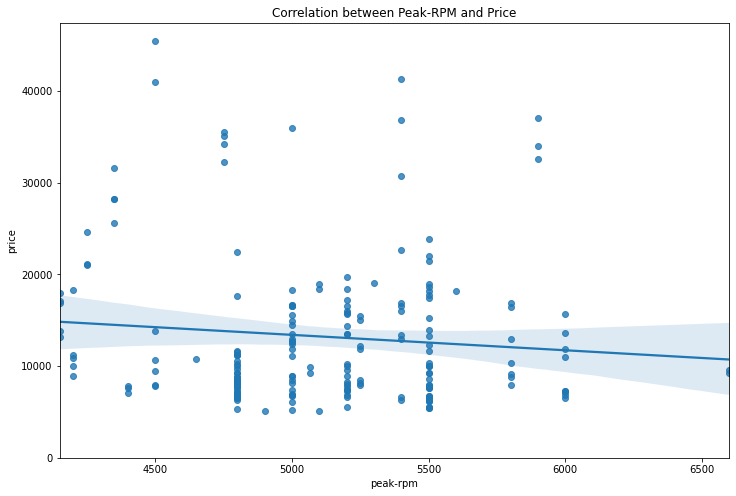

In [224]:
# Now lets plot the relationship between peak-rpm and price

plt.figure(figsize=(12,8))
plt.title('Correlation between Peak-RPM and Price')
sns.regplot(x='peak-rpm', y='price', data=car_DF)
plt.ylim(0,)

**We can see that peak-rpm and price have a weak correlation. For example both low peak-rpm and high peak-rpm have both high and low prices.**  
**This means peak-rpm and price have a weak correlation as the increase in one does not naturally tend to lead to the increase or decrease of the other, and vice-versa. Therefore we cannot use peak-rpm as a predictor for price.** 

### Correlation Statistics  
#### Pearson's Correlation:  
**This measures the strength of the correlation between two variables.**  
**Pearsons correlation method gives two values**  
**1. Correlation Coefficient**  
**2. The P-Value**

#### Interpretation of Pearson's Correlation:  
**1. Correlation Coefficient.**  
**This gives a number that indicates the type of correlation between two variables.**  
**Value close to  +1: Strong Positive Relationship.**  
**Value close to  -1: Strong Negative Relationship.**  
**Value close to  0: No Relationship.** 


**2. The P-Value.** 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>  

**This gives a number that tells us how certain we are of the correlation value.**  
**P-Value < 0.001 indicates a strong certainty in the result.**  
**P-Value > 0.001 and < 0.05 indicates a moderate certainty.**  
**P-Value > 0.05 < 0.1 indicates a weak correlation certainty.**  
**P-Value > 0.1 No Certainty in The Result.**


**In Summary.**  
**1. We can say there is a strong positive or negative correlation when correlation coefficient is close to 1 or -1 and P-Value < 0.001**  


In [225]:
print(1 < 0.1)

False


In [226]:
# Let's calculate the Pearson's correlation between horsepower and price package.

# First let's convert horsepower column from object to int

In [227]:
car_DF['horsepower'].unique()

# This shows us all unique elements in 'horsepower'.

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [228]:
# Let's convert all nan type values to '0'

car_DF['horsepower'].replace('?','0', inplace=True)

In [229]:
# Let's convert horsepower from object to int

car_DF['horsepower'] = car_DF['horsepower'].astype('int64')

In [230]:
# let's find the mean of horsepower and cast it to int just incase

horse_mean = int(car_DF['horsepower'].mean())
horse_mean

102

In [231]:
# Now lets replace zero in horsepower with the mean of horsepower

car_DF['horsepower'].replace(0, horse_mean, inplace=True)

#### Calculate Pearson's correlation using the pandas .corr() method

In [232]:
# Now let's calculate the pearsons corr of horsepower and price using the pandas .corr() method

car_DF['horsepower'].corr(car_DF['price'], method='pearson')

0.8098455263640317

#### To find the correlation of variables of type int64 or float64, from the entire DataFrame we can simply do this 

In [233]:
car_DF.corr(method='pearson')

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,0.075742,0.279566,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,0.371414,-0.359732,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,0.579576,-0.286452,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,0.614884,-0.246177,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.086800,-0.309492,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,0.758015,-0.279258,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,0.822598,-0.256872,-0.650546,-0.679571,0.872335
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,-0.214292,-0.435301,0.331425,0.268465,0.071107
horsepower,0.075742,0.371414,0.579576,0.614884,-0.086800,0.758015,0.822598,-0.214292,1.000000,0.107915,-0.822006,-0.804599,0.809846
peak-rpm,0.279566,-0.359732,-0.286452,-0.246177,-0.309492,-0.279258,-0.256872,-0.435301,0.107915,1.000000,-0.114985,-0.058651,-0.101046


#### Calculate Pearson's correlation using the Scipy.stats() method

<h3>Horsepower and Price</h3>

In [234]:
Pearson_coef, P_value = stats.pearsonr(car_DF['horsepower'],car_DF['price'])

# Now print the pearson's corr value and P_value

print('Pearson_coef for horsepower and price:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for horsepower and price: 0.8098455263640314 with a P-Value of 5.608810043890871e-48
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Horsepower and price is statistically significant, and the linear relationship is quite strong too (~0.81)</p>

<h3>Wheel-base and Price</h3>

In [235]:
Pearson_coef,P_value = stats.pearsonr(car_DF['wheel-base'],car_DF['price'])

print('Pearson_coef for wheel-base and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for wheel-base and price is: 0.584641822265508 with a P-Value of 8.076488270733218e-20
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

**Find correlation between length and price**

In [236]:
Pearson_coef,P_value = stats.pearsonr(car_DF['length'],car_DF['price'])

print('Pearson_coef for length and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for length and price is: 0.6906283804483639 with a P-Value of 8.016477466159328e-30
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h3>Width vs Price</h3>

In [237]:
Pearson_coef,P_value = stats.pearsonr(car_DF['width'],car_DF['price'])

print('Pearson_coef for width and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for width and price is: 0.7512653440522674 with a P-Value of 9.200335510481516e-38
P_value is less than 0.01 True


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

<h3>Curb-weight vs Price</h3>

In [238]:
Pearson_coef,P_value = stats.pearsonr(car_DF['curb-weight'],car_DF['price'])

print('Pearson_coef for curb-weight and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for curb-weight and price is: 0.8344145257702843 with a P-Value of 2.189577238894065e-53
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [239]:
Pearson_coef,P_value = stats.pearsonr(car_DF['engine-size'],car_DF['price'])

print('Pearson_coef for engine-size and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for engine-size and price is: 0.8723351674455185 with a P-Value of 9.265491622198389e-64
P_value is less than 0.01 True


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h3>City-mpg vs Price</h3>

In [240]:
Pearson_coef,P_value = stats.pearsonr(car_DF['city-mpg'],car_DF['price'])

print('Pearson_coef for bore and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for bore and price is: -0.6865710067844678 with a P-Value of 2.321132065567641e-29
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<p>Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.</p>
<p>Hint: if you would like to select those columns  use the following syntax: df[['bore','stroke' ,'compression-ratio','horsepower']]</p>
</div>

In [241]:
# Using car_DF.dtypes we can see that both 'bore' and 'stroke' are object data types. 
# Thus we need to convert them to float64 since bore and stroke contain float type values in object form
# But we must check each variable to be certain no NaN values

car_DF['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [242]:
# first replace '?' with '0' so we can further convert to float64
car_DF['bore'].replace('?','0',inplace=True)

# Next convert to float64
car_DF['bore'] = car_DF['bore'].astype('float64')

# Next find the mean, so we can update missing values to column mean
mean_bore = car_DF['bore'].mean()

# Finally update missing values to column mean
car_DF['bore'].replace(0.0, mean_bore, inplace=True)

In [243]:
car_DF['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [244]:
# first replace '?' with '0' so we can further convert to float64
car_DF['stroke'].replace('?','0',inplace=True)

# Next convert to float64
car_DF['stroke'] = car_DF['stroke'].astype('float64')

# Next find the mean, so we can update missing values to column mean
mean_stroke = car_DF['stroke'].mean()

# Finally update missing values to column mean
car_DF['stroke'].replace(0.0, mean_stroke, inplace=True)

In [245]:
# Now let's find the correlation between 'bore', 'stroke','comppression_ratio', 'horsepower'

car_DF[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.054341,0.002192,0.565505
stroke,-0.054341,1.000000,0.188559,0.096342
compression-ratio,0.002192,0.188559,1.000000,-0.214292
horsepower,0.565505,0.096342,-0.214292,1.000000


<h3>Bore vs Price</h3>

In [246]:
Pearson_coef,P_value = stats.pearsonr(car_DF['bore'],car_DF['price'])

print('Pearson_coef for bore and price is:',Pearson_coef,'with a P-Value of',P_value)
print('P_value is less than 0.01',(P_value < 0.01))

Pearson_coef for bore and price is: 0.5429449758425009 with a P-Value of 8.316110820817107e-17
P_value is less than 0.01 True


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke", y="price".</p>
<p>Hint: if you would like to select those columns  use the following syntax: df[["stroke","price"]]  </p>
</div>

(0.0, 47414.1)

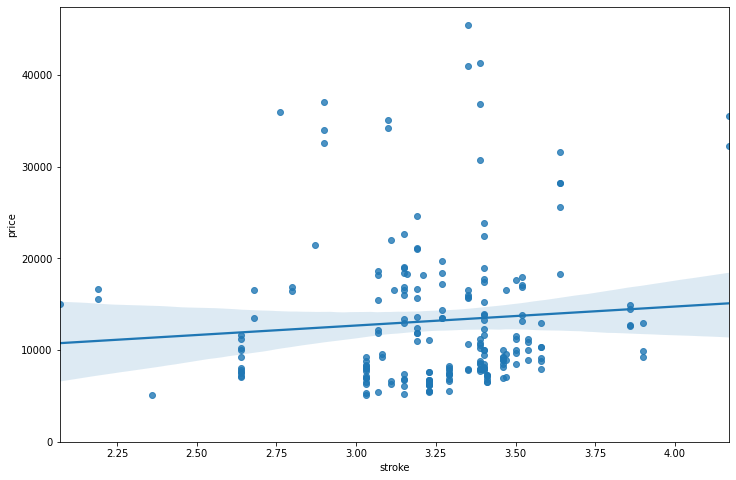

In [247]:
plt.figure(figsize=(12,8))
sns.regplot(x='stroke', y='price', data=car_DF)
plt.ylim(0,)

In [248]:
# we can find the correlation between stroke and price like below

car_DF[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08233
price,0.08233,1.00000


<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

**Let's look at the relationship between "body-style" and "price".**

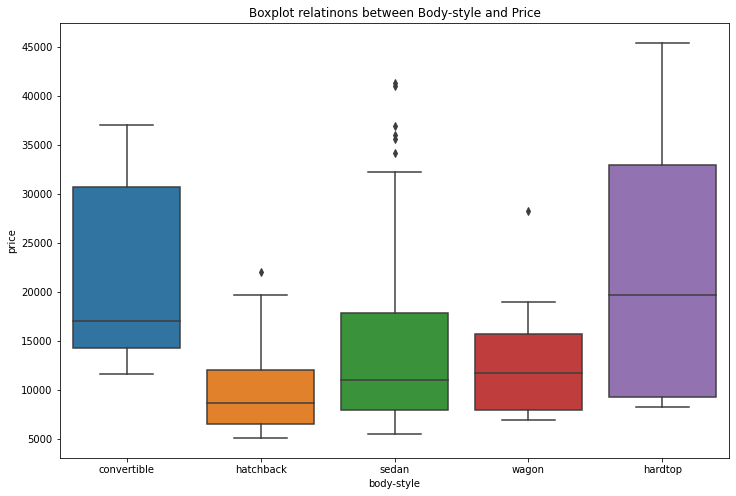

In [249]:
plt.figure(figsize=(12,8))
plt.title('Boxplot relatinons between Body-style and Price')
sns.boxplot(x='body-style', y='price', data=car_DF)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.Let's examine engine "engine-location" and "price":</p>

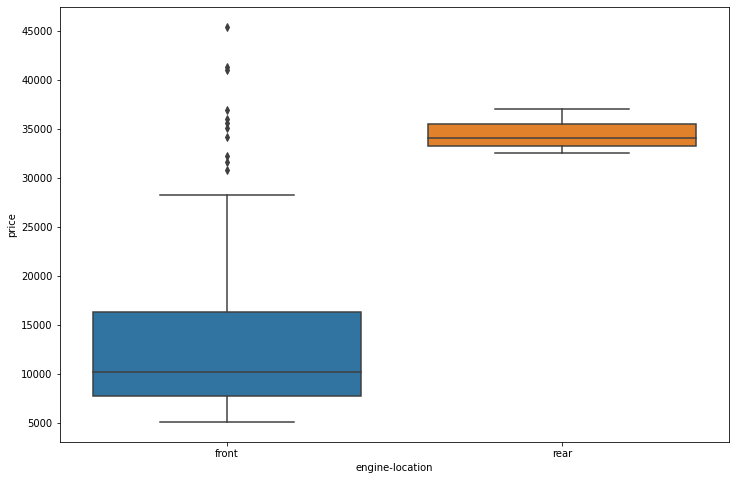

In [250]:
plt.figure(figsize=(12,8))
sns.boxplot(x='engine-location', y='price', data=car_DF)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

In [251]:
car_DF['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

#### On the contrary, we would have to ignore engine-location as a price predictor because the result will be skewed,  
**Since there are 198 front types and only 3 rear types. it is a skewed variable.**

**Let's examine "drive-wheels" and "price".**

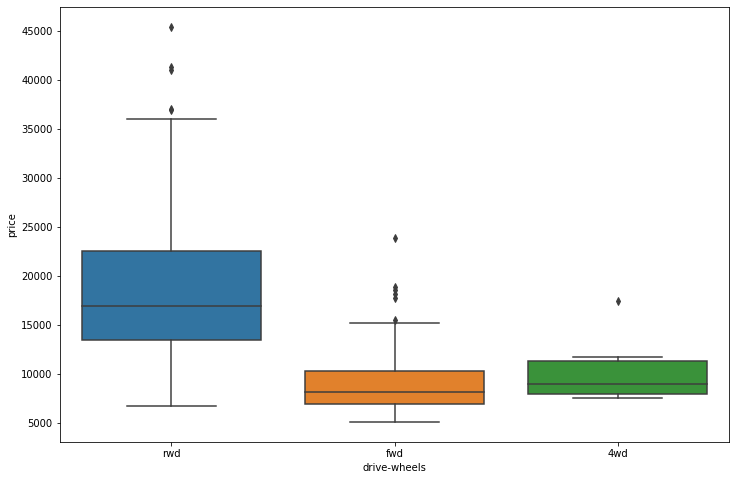

In [252]:
plt.figure(figsize=(12,8))
sns.boxplot(x='drive-wheels', y='price', data=car_DF)

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style" ? </p>
</div>

In [253]:
car_DF[['body-style', 'price']].groupby('body-style',as_index=False).mean()

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Anova:  
#### Analysis of Variance:  
**This is a statistical test that can be used to find the correlation between different groups of a categorical variable.**  
#### Anova Test:  
**The anaova test returns 2(two) values the F-Test score and the P-Value:**  
**The F-Test:-**  
**Calculates the ratio of variation between the group's mean, over the variation between each of the sample groups.**  
**I.e, variation between the sample group's mean divided by variation within the Sample group.**


**The P-Value:-**  
**This shows whether the obtained result is statistically significant.**  


**In summary, we can say there is a strong correlation between a categorical variable and other variables,**  
**If the Anova test gives us a large F-test value and a small P-Value.**

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h3>Drive Wheels</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>


In [254]:
test_grp = car_DF[['drive-wheels','price']].groupby('drive-wheels')
test_grp.head(2)

,drive-wheels,price
0,rwd,13495
1,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
140,4wd,7603


We can obtain the values of the method group using the method "get_group".  

In [255]:
test_grp.get_group('4wd')['price']

4      17450
140     7603
144     9233
145    11259
148     8013
149    11694
154     7898
155     8778
Name: price, dtype: int64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [256]:
F_val,P_val = stats.f_oneway(test_grp.get_group('4wd')['price'], \
                             test_grp.get_group('rwd')['price'], \
                             test_grp.get_group('fwd')['price'])
print('F-test score:',F_val,'and P_val:',P_val)
print('P_val is less than 0.01', (P_val < 0.01))

F-test score: 67.95406500780402 and P_val: 3.3945443577150617e-23
P_val is less than 0.01 True


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>